<a href="https://colab.research.google.com/github/AmirGhnbr/statistical_time_series_analysis/blob/main/statistical_time_series_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q seaborn arch yfinance scikit-learn pmdarima mplfinance sktime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 916.4/916.4 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 66.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.1/73.1 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.0/17.0 MB 67.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.2/118.2 kB 9.8 MB/s eta 0:00:00


In [2]:
!pip install git+https://github.com/statsmodels/statsmodels

  Cloning https://github.com/statsmodels/statsmodels to /tmp/pip-req-build-frz4gamx
  Running command git clone --filter=blob:none --quiet https://github.com/statsmodels/statsmodels /tmp/pip-req-build-frz4gamx
  Resolved https://github.com/statsmodels/statsmodels to commit 3b61c469ed8d4a6752b5bf01390789512f81f0c6
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for statsmodels: filename=statsmodels-0.15.0.dev44+g3b61c469e-cp310-cp310-linux_x86_64.whl size=23252589 sha256=3a95dd8444f0151cc86cb74c4b91809f56e5a48a73ddd52dd2f44f8a6cdf8923
  Stored in directory: /tmp/pip-ephem-wheel-cache-54jww84m/wheels/80/42/7e/512a0e0b733106dec3d046d1f77208d4f64f601a266ad861dc
Successfully built statsmodels
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.13.5
    Uninstalling statsmodels-0.13.5:
      Successfully uninstalled s

In [3]:
import pandas as pd
import numpy as np
import yfinance as yf
import mplfinance as mplf
import matplotlib.pyplot as plt

In [4]:
data = yf.download('BTC-USD',
                   period='9mo',
                   interval='1d',
                   progress=False)
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-10-06,20161.039062,20408.392578,19900.087891,19955.443359,19955.443359,34711412966
2022-10-07,19957.558594,20041.085938,19395.792969,19546.849609,19546.849609,29227315390
2022-10-08,19546.328125,19601.695312,19299.414062,19416.568359,19416.568359,16437423167
2022-10-09,19417.478516,19542.539062,19349.259766,19446.425781,19446.425781,16837262532
2022-10-10,19446.416016,19515.466797,19102.978516,19141.484375,19141.484375,27425022774
...,...,...,...,...,...,...
2023-07-02,30587.269531,30766.140625,30264.019531,30620.769531,30620.769531,10533418042
2023-07-03,30624.515625,31375.613281,30586.513672,31156.439453,31156.439453,15271884873
2023-07-04,31156.865234,31325.197266,30659.355469,30777.582031,30777.582031,12810828427


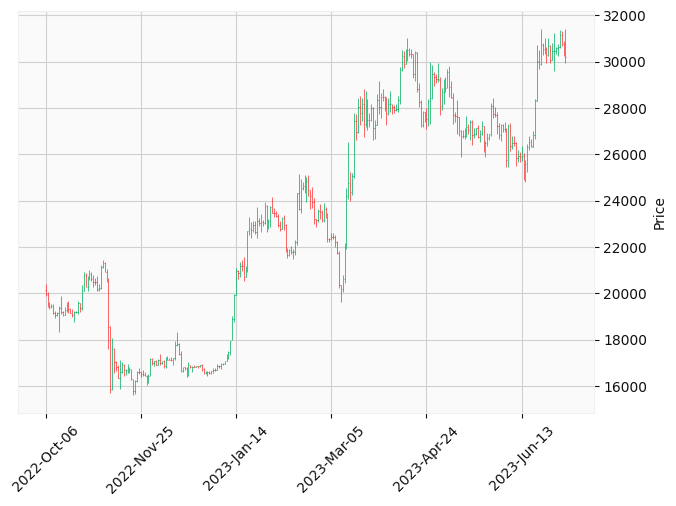

In [5]:
mplf.plot(data, style='yahoo',warn_too_much_data=10000)

### Trying to decompose the non-stationary btc data using stl

In [6]:
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

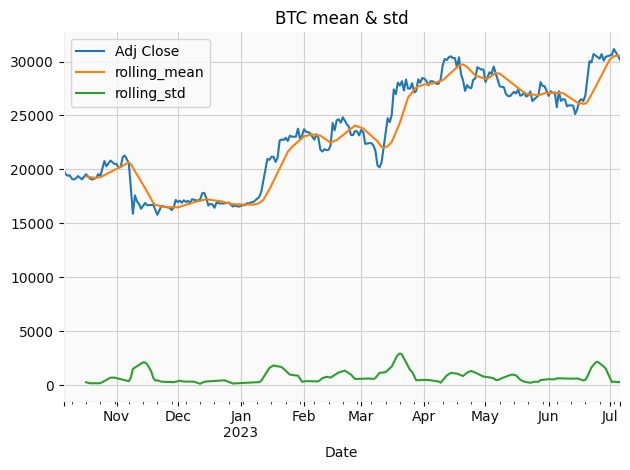

In [7]:
WINDOW_SIZE = 12
data["rolling_mean"] = data["Adj Close"].rolling(window=WINDOW_SIZE).mean()
data["rolling_std"] = data["Adj Close"].rolling(window=WINDOW_SIZE).std()
data[['Adj Close','rolling_mean','rolling_std']].plot(title="BTC mean & std")

sns.despine()
plt.tight_layout()

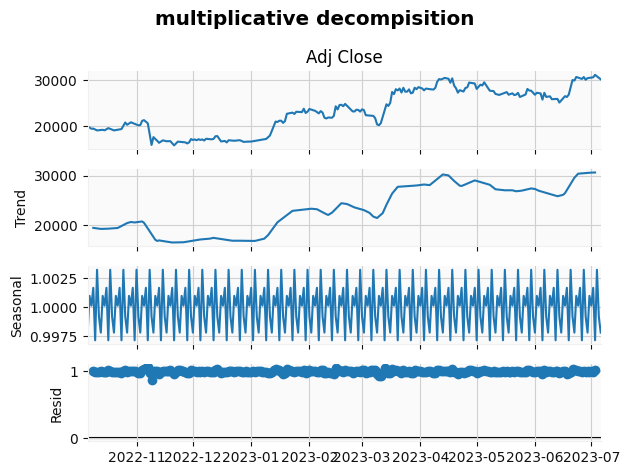

In [8]:
decomposition_res = seasonal_decompose(data['Adj Close'],model='multiplicative')

(
    decomposition_res
    .plot()
    .suptitle('multiplicative decompisition')
)
sns.despine()
plt.tight_layout()

### Let's do STL ans mstl decomposition

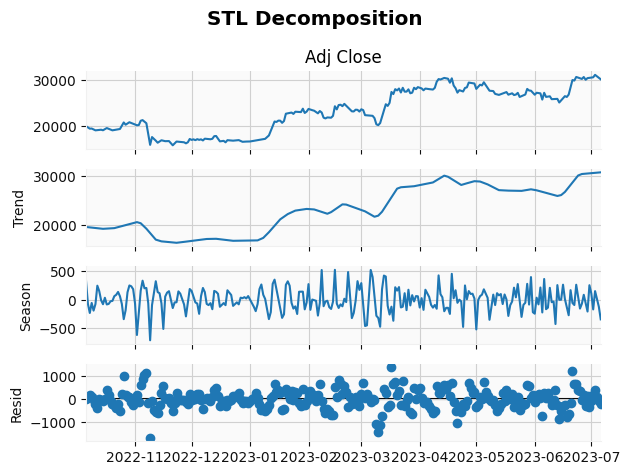

In [9]:
from statsmodels.tsa.seasonal import STL

stl_decomposition = STL(data["Adj Close"]).fit()
stl_decomposition.plot() \
                 .suptitle("STL Decomposition")

sns.despine()
plt.tight_layout()

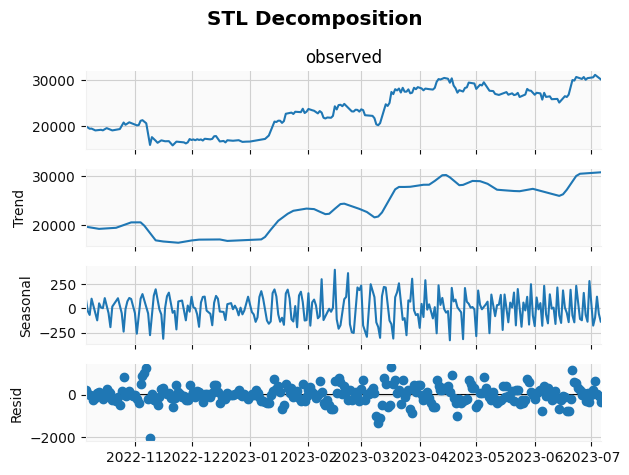

In [10]:
from statsmodels.tsa.seasonal import MSTL

stl_decomposition = MSTL(data["Adj Close"]).fit()
stl_decomposition.plot() \
                 .suptitle("STL Decomposition")

sns.despine()
plt.tight_layout()

## Apply hodrick-prescott filter

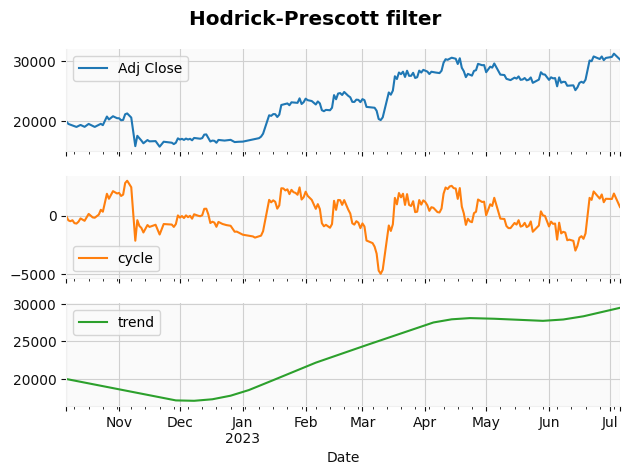

In [11]:
from statsmodels.tsa.filters.hp_filter import hpfilter

hp_df = data[["Adj Close"]].copy()
hp_df["cycle"], hp_df["trend"] = hpfilter(hp_df["Adj Close"], 129600)
hp_df.plot(subplots=True, title="Hodrick-Prescott filter");

sns.despine()
plt.tight_layout()

As you see BTC was finished a down trend in Dec and start new uptrend in Jan, and that trend finished in May , now new uptrend in BTC started at Jul as it was in Jan, expecting to have another 3.5 month uptrend

## Testing for Stationary in time series

Implement:

* Augmented Dickey-Fuller(ADF) test
* Kwiatkowski-philips-Schmidt-Shin (KPSS) test

In [12]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller, kpss

> A unit root is a feature of a time series that makes it non-stationary, meaning that its statistical properties change over time.

> The ADF test is commonly used in econometrics and finance to test for the presence of a trend in a time series dataset. The null hypothesis of the ADF test is that the time series has a unit root, meaning that it is non-stationary.

In [13]:
def adf_test(x):
  indeces = ["Test Statistic", "p-value","# of Lags Used", "# of Observations Used"]

  adf_test = adfuller(x, autolag='AIC')
  results = pd.Series(adf_test[0:4],index = indeces)
  for key, value in adf_test[4].items():
    results[f"Critical Value ({key})"] = value
  return results

In [14]:
adf_test(data['Adj Close'])

Test Statistic             -0.616275
p-value                     0.867262
# of Lags Used              0.000000
# of Observations Used    273.000000
Critical Value (1%)        -3.454533
Critical Value (5%)        -2.872186
Critical Value (10%)       -2.572443
dtype: float64

the p-value in greater than the threshold value (0.05)

In [15]:
def kpss_test(x, h0_type="c"):
 indices = ["Test Statistic", "p-value", "# of Lags"]
 kpss_test = kpss(x, regression=h0_type);
 results = pd.Series(kpss_test[0:3], index=indices)

 for key, value in kpss_test[3].items():
    results[f"Critical Value ({key})"] = value
 return results

In [16]:
kpss_test(data['Adj Close'])

<ipython-input-15-ca4edb5552cd>:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_test = kpss(x, regression=h0_type);


Test Statistic            2.18521
p-value                   0.01000
# of Lags                10.00000
Critical Value (10%)      0.34700
Critical Value (5%)       0.46300
Critical Value (2.5%)     0.57400
Critical Value (1%)       0.73900
dtype: float64

* The null hypothesis of the kpss test states that the time series is stationary. With a p-value of 0.01 (less than the threshold 0.05) which rejects the hypothesis => time series is non-stationary


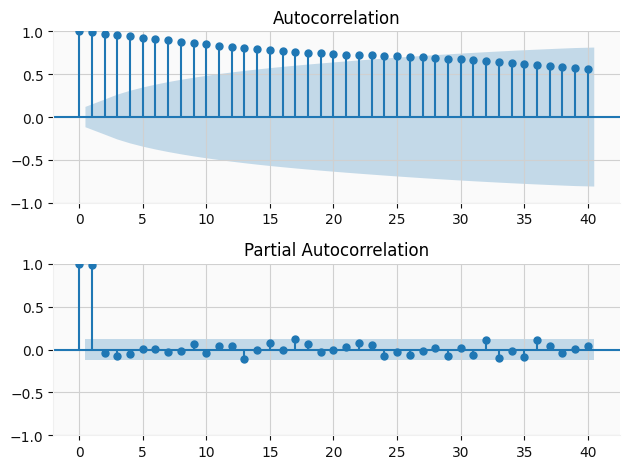

In [17]:
def plot_acf_pacf(data):
    N_LAGS= 40
    SIGNIFICANCE_LEVEL = 0.05

    fig, ax = plt.subplots(2, 1)
    plot_acf(data, ax=ax[0],lags=N_LAGS,
    alpha=SIGNIFICANCE_LEVEL);
    plot_pacf(data, ax=ax[1],lags=N_LAGS,
    alpha=SIGNIFICANCE_LEVEL);

    sns.despine()
    plt.tight_layout()


plot_acf_pacf(data['Adj Close'])

### Zivot Andrews test

In [18]:
from arch.unitroot import ZivotAndrews
za = ZivotAndrews(data['Adj Close'])
print(za.summary().as_text())

        Zivot-Andrews Results        
Test Statistic                 -3.319
P-value                         0.785
Lags                                0
-------------------------------------

Trend: Constant
Critical Values: -5.28 (1%), -4.81 (5%), -4.57 (10%)
Null Hypothesis: The process contains a unit root with a single structural break.
Alternative Hypothesis: The process is trend and break stationary.


## Make time series stationary

Calculating the log-return of the data will make it a stationary

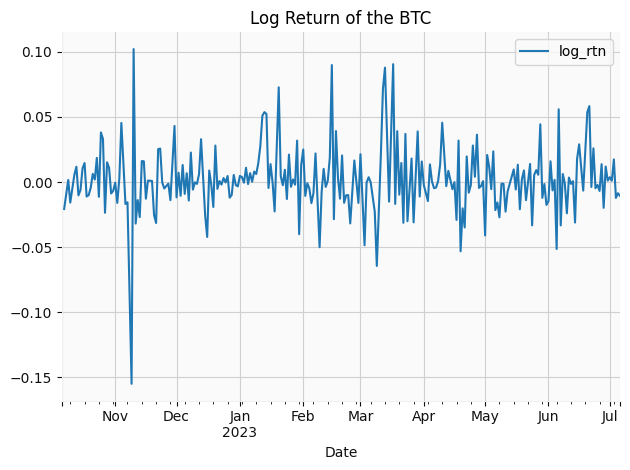

In [19]:
data['log_rtn']=np.log(data['Adj Close']/data['Adj Close'].shift(1))

(
    data.loc[:,['log_rtn']]
    .plot(title='Log Return of the BTC')
)
sns.despine()
plt.tight_layout()

In [20]:
from arch.unitroot import ADF
adf=ADF(data['log_rtn'].dropna())
print(adf.summary().as_text())

   Augmented Dickey-Fuller Results   
Test Statistic                -15.862
P-value                         0.000
Lags                                0
-------------------------------------

Trend: Constant
Critical Values: -3.45 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [21]:
adf_test(data['log_rtn'].dropna())

Test Statistic           -1.586223e+01
p-value                   9.183627e-29
# of Lags Used            0.000000e+00
# of Observations Used    2.720000e+02
Critical Value (1%)      -3.454622e+00
Critical Value (5%)      -2.872225e+00
Critical Value (10%)     -2.572464e+00
dtype: float64

In [22]:
kpss_test(data['log_rtn'].dropna())

<ipython-input-15-ca4edb5552cd>:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_test = kpss(x, regression=h0_type);


Test Statistic           0.10397
p-value                  0.10000
# of Lags                3.00000
Critical Value (10%)     0.34700
Critical Value (5%)      0.46300
Critical Value (2.5%)    0.57400
Critical Value (1%)      0.73900
dtype: float64

the data is now stationary

## Modeling time series with exponential smoothing methods

In [23]:
from statsmodels.tsa.holtwinters import (ExponentialSmoothing,
                                         SimpleExpSmoothing,
                                         Holt)

In [24]:
train_size = int(0.8 * len(data['Adj Close'].dropna()))
test_len = len(data['Adj Close'].dropna())-train_size
df_train = data['Adj Close'].dropna().iloc[:train_size]
df_test = data['Adj Close'].dropna().iloc[train_size:]

In [25]:
ses_1 = SimpleExpSmoothing(df_train).fit(smoothing_level=0.5)
ses_forecast_1 = ses_1.forecast(test_len);

ses_2 = SimpleExpSmoothing(df_train).fit()
ses_forecast_2 = ses_2.forecast(test_len);

ses_1.params_formatted

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


,name,param,optimized
smoothing_level,alpha,0.500000,False
initial_level,l.0,19955.443359,False


In [26]:
ses_1.summary()

Dep. Variable:,Adj Close,No. Observations:,219
Model:,SimpleExpSmoothing,SSE,112248615.982
Optimized:,False,AIC,2883.227
Trend:,None,BIC,2890.005
Seasonal:,None,AICC,2883.414
Seasonal Periods:,None,Date:,"Thu, 06 Jul 2023"
Box-Cox:,False,Time:,21:26:44
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.5000000,alpha,False
initial_level,19955.443,l.0,False


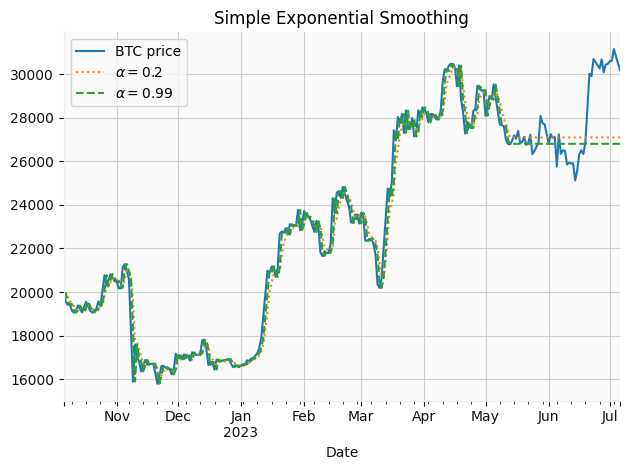

In [27]:
ses_df = data.copy()
ses_df["ses_1"] = pd.concat([ses_1.fittedvalues,ses_forecast_1])
ses_df["ses_2"] = pd.concat([ses_2.fittedvalues,ses_forecast_2])

opt_alpha = ses_2.model.params["smoothing_level"]

fig, ax = plt.subplots()
ses_df[['Adj Close','ses_1','ses_2']].plot(style=["-",":","--"], ax=ax,
                     title="Simple Exponential Smoothing")
labels = [
    "BTC price",
    r"$\alpha=0.2$",
    r"$\alpha={0:.2f}$".format(opt_alpha),
]
ax.legend(labels)

sns.despine()
plt.tight_layout()

fit 3 varriants of HOLT's linear trend model and create forecast

In [28]:
# Holt's model with linear trend
hs_1 = Holt(df_train).fit()
hs_forecast_1 = hs_1.forecast(test_len)

# Holt's model with exponential trend
hs_2 = Holt(df_train, exponential=True).fit()
# equivalent to ExponentialSmoothing(df_train, trend="mul").fit()
hs_forecast_2 = hs_2.forecast(test_len)

# Holt's model with exponential trend and damping
hs_3 = Holt(df_train, exponential=False,
            damped_trend=True).fit()
hs_forecast_3 = hs_3.forecast(test_len)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [29]:
hs_3.params_formatted

,name,param,optimized
smoothing_level,alpha,0.995000,True
smoothing_trend,beta,0.047381,True
initial_level,l.0,19955.443359,False
initial_trend,b.0,-404.507812,False
damping_trend,phi,0.990000,True


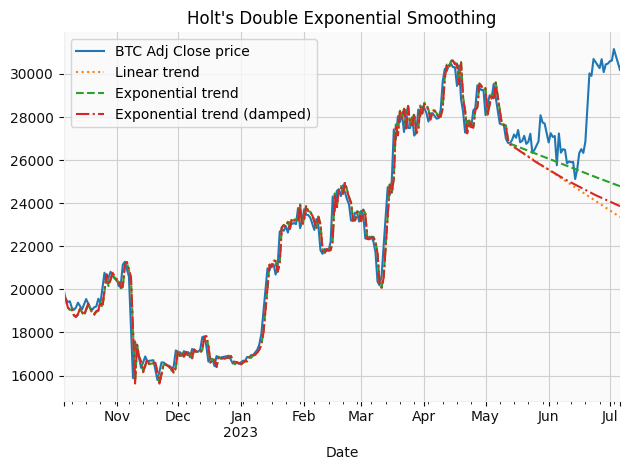

In [30]:
hs_df = data.copy()
hs_df["hs_1"] = pd.concat([hs_1.fittedvalues,hs_forecast_1])
hs_df["hs_2"] = pd.concat([hs_2.fittedvalues,hs_forecast_2])
hs_df["hs_3"] = pd.concat([hs_3.fittedvalues,hs_forecast_3])

fig, ax = plt.subplots()
hs_df[['Adj Close','hs_1','hs_2','hs_3']].plot(style=["-",":","--", "-."], ax=ax,
                    title="Holt's Double Exponential Smoothing")
labels = [
    "BTC Adj Close price",
    "Linear trend",
    "Exponential trend",
    "Exponential trend (damped)",
]
ax.legend(labels)

sns.despine()
plt.tight_layout()

In [31]:
SEASONAL_PERIODS = 7

# Holt-Winters' model with exponential trend
hw_1 = ExponentialSmoothing(df_train,
                            trend="mul",
                            seasonal="add",
                            seasonal_periods=SEASONAL_PERIODS).fit()
hw_forecast_1 = hw_1.forecast(test_len)

# Holt-Winters' model with exponential trend and damping
hw_2 = ExponentialSmoothing(df_train,
                            trend="mul",
                            seasonal="add",
                            seasonal_periods=SEASONAL_PERIODS,
                            damped_trend=True).fit()
hw_forecast_2 = hw_2.forecast(test_len)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [32]:
hw_2.params_formatted

,name,param,optimized
smoothing_level,alpha,0.995000,True
smoothing_trend,beta,0.035536,True
smoothing_seasonal,gamma,0.005000,True
initial_level,l.0,19311.622675,True
initial_trend,b.0,0.999499,True
damping_trend,phi,0.990000,True
initial_seasons.0,s.0,-185.469119,True
initial_seasons.1,s.1,54.400022,True
initial_seasons.2,s.2,141.690828,True
initial_seasons.3,s.3,214.238680,True


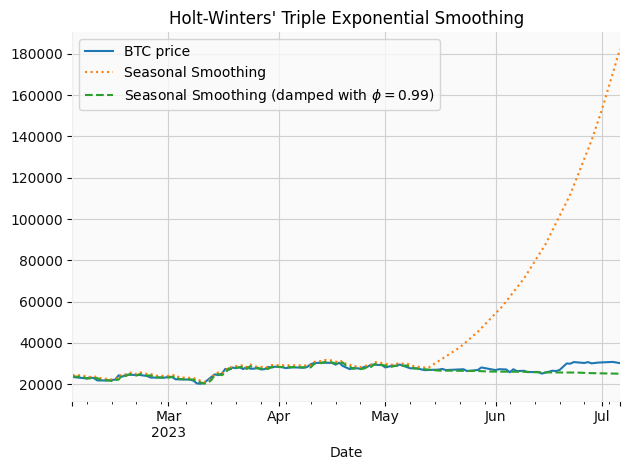

In [33]:
hw_df = data.copy()
hw_df["hw_1"] = pd.concat([hw_1.fittedvalues,hw_forecast_1])
hw_df["hw_2"] = pd.concat([hw_2.fittedvalues,hw_forecast_2])

fig, ax = plt.subplots()
hw_df = hw_df[hw_df.index>'2023-02']
hw_df[['Adj Close','hw_1','hw_2']].plot(
    style=["-",":","--"], ax=ax,
    title="Holt-Winters' Triple Exponential Smoothing"
)
phi = hw_2.model.params["damping_trend"]

labels = [
    "BTC price",
    "Seasonal Smoothing",
    f"Seasonal Smoothing (damped with $\phi={phi:.2f}$)"
]
ax.legend(labels)

sns.despine()
plt.tight_layout()

## Auto ETS

In [34]:
from sktime.forecasting.ets import AutoETS
from sklearn.metrics import mean_absolute_percentage_error

In [35]:
auto_ets = AutoETS(auto=True, n_jobs=-1, sp=7)
auto_ets.fit(df_train.to_period())
auto_ets_fcst = auto_ets.predict(fh=list(range(1, 13)))


In [36]:
print(auto_ets.summary())

                                 ETS Results                                  
Dep. Variable:              Adj Close   No. Observations:                  219
Model:                       ETS(MNN)   Log Likelihood               -1706.535
Date:                Thu, 06 Jul 2023   AIC                           3419.070
Time:                        21:27:02   BIC                           3429.238
Sample:                    10-06-2022   HQIC                          3423.177
                         - 05-12-2023   Scale                            0.001
Covariance Type:               approx                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
smoothing_level     0.9999      0.067     14.959      0.000       0.869       1.131
initial_level    1.972e+04    525.197     37.554      0.000    1.87e+04    2.08e+04
Ljung-Box (Q):                  

<ipython-input-37-fec1b09f994d>:6: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  .append(auto_ets_fcst)


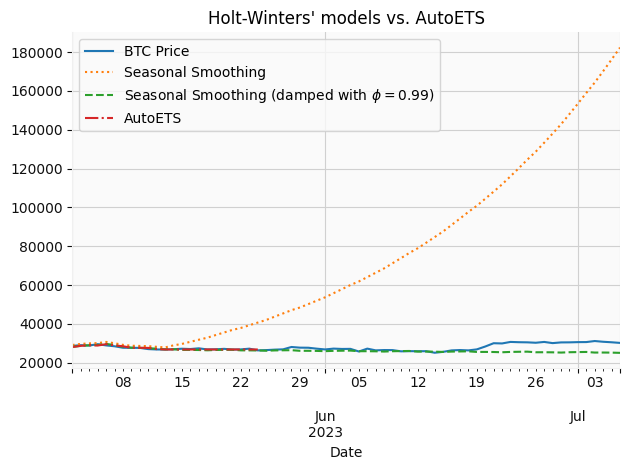

In [37]:
auto_ets_df = hw_df.to_period().copy()
auto_ets_df["auto_ets"] = (
    auto_ets
    ._fitted_forecaster
    .fittedvalues
    .append(auto_ets_fcst)
)

fig, ax = plt.subplots()
auto_ets_df=auto_ets_df[auto_ets_df.index>'2023-05']
auto_ets_df[['Adj Close','hw_1','hw_2','auto_ets']].plot(
    style=["-",":","--","-."], ax=ax,
    title="Holt-Winters' models vs. AutoETS"
)
labels = [
    "BTC Price",
    "Seasonal Smoothing",
    f"Seasonal Smoothing (damped with $\phi={phi:.2f}$)",
    "AutoETS",
]
ax.legend(labels)

sns.despine()
plt.tight_layout()

## Modeling time series with ARIMA class models

In [38]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_percentage_error

In [39]:
import math
(math.e ** np.log(data['Adj Close']/data['Adj Close'].shift(1)).sum())*19955.44

30190.428511377977

In [88]:
train_size = int(0.8 * len(data['Adj Close'].dropna()))
test_len = len(data['Adj Close'].dropna())-train_size
df_train = data.iloc[:train_size]
df_test = data.iloc[train_size:]
len(df_train), len(df_test)

(219, 55)

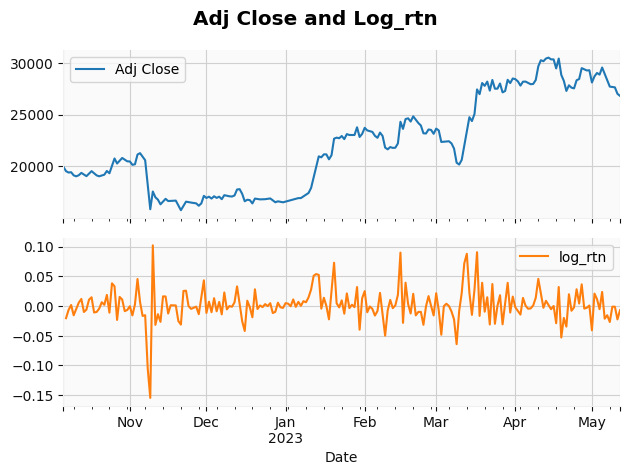

In [41]:
df_train[['Adj Close','log_rtn']].plot(subplots=True,
                                       title='Adj Close and Log_rtn')

sns.despine()
plt.tight_layout()

In [42]:
arima_111 = ARIMA(
    df_train['log_rtn'],order=(1,1,1)
).fit()
print(arima_111.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                log_rtn   No. Observations:                  219
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 463.642
Date:                Thu, 06 Jul 2023   AIC                           -921.283
Time:                        21:27:06   BIC                           -911.130
Sample:                    10-06-2022   HQIC                          -917.182
                         - 05-12-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0685      0.030      2.271      0.023       0.009       0.128
ma.L1         -0.9999      2.745     -0.364      0.716      -6.379       4.379
sigma2         0.0007      0.002      0.366      0.7

In [44]:
arima_202 = ARIMA(
    df_train["log_rtn"], order=(2, 0, 2)
).fit()
print(arima_202.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                log_rtn   No. Observations:                  219
Model:                 ARIMA(2, 0, 2)   Log Likelihood                 476.897
Date:                Thu, 06 Jul 2023   AIC                           -941.795
Time:                        21:27:29   BIC                           -921.460
Sample:                    10-06-2022   HQIC                          -933.582
                         - 05-12-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0013      0.002      0.601      0.548      -0.003       0.006
ar.L1          0.1914      7.886      0.024      0.981     -15.265      15.648
ar.L2          0.1654      3.338      0.050      0.9

In [45]:
data['pred_111_log_rtn']= pd.concat([df_train['log_rtn'], arima_111.forecast(test_len)])

forecast = arima_111.forecast(test_len)
pred_price_list = np.exp(data['pred_111_log_rtn'].cumsum())

data['pred_111'] = np.array(pred_price_list)* data['Adj Close'][0]
data['pred_111'].tail()

Date
2023-07-02    28687.491401
2023-07-03    28726.052461
2023-07-04    28764.665354
2023-07-05    28803.330150
2023-07-06    28842.046917
Name: pred_111, dtype: float64

In [89]:
data['pred_202_log_rtn']= pd.concat([df_train["log_rtn"], arima_202.forecast(test_len)])

forecast = arima_202.forecast(test_len)
pred_price_list = np.exp(data['pred_202_log_rtn'].cumsum())

data['pred_202'] = np.array(pred_price_list)* data['Adj Close'][0]
data['pred_202'].tail(),data['Adj Close'][-1]

(Date
 2023-07-02    28616.712101
 2023-07-03    28654.685923
 2023-07-04    28692.710134
 2023-07-05    28730.784804
 2023-07-06    28768.909997
 Name: pred_202, dtype: float64,
 30190.43359375)

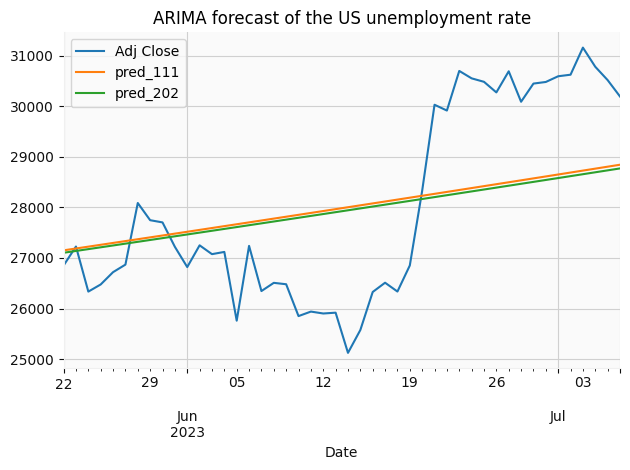

In [49]:
latest_data = data[data.index>'2023-05-20']


(
    latest_data[["Adj Close", "pred_111", "pred_202"]]
    .iloc[1:]
    .plot(title="ARIMA forecast of BTC price")
);

sns.despine()
plt.tight_layout()

In [50]:
mape_111 = mean_absolute_percentage_error(
    data["Adj Close"].iloc[-test_len:],
    data["pred_111"].iloc[-test_len:]
)

mape_202 = mean_absolute_percentage_error(
    data["Adj Close"].iloc[-test_len:],
    data["pred_202"].iloc[-test_len:]
)

print(f"MAPE of ARIMA(1,1,1): {100 * mape_111:.2f}%")
print(f"MAPE of ARIMA(2,0,2): {100 * mape_202:.2f}%")



MAPE of ARIMA(1,1,1): 4.23%
MAPE of ARIMA(2,0,2): 4.22%


In [53]:
preds_df = arima_202.get_forecast(test_len).summary_frame()
preds_df.columns = ["fcst", "fcst_se", "ci_lower", "ci_upper"]
plot_df = df_test[["log_rtn"]].join(np.exp(preds_df))
plot_df.head()

,log_rtn,fcst,fcst_se,ci_lower,ci_upper
Date,,,,,
2023-05-13,-0.000780,1.000245,1.027514,0.948424,1.054898
2023-05-14,0.005457,1.000767,1.027575,0.948809,1.055571
2023-05-15,0.009684,1.001041,1.027581,0.949058,1.055871
2023-05-16,-0.005755,1.001180,1.027584,0.949184,1.056023
2023-05-17,0.013306,1.001251,1.027584,0.949251,1.056100


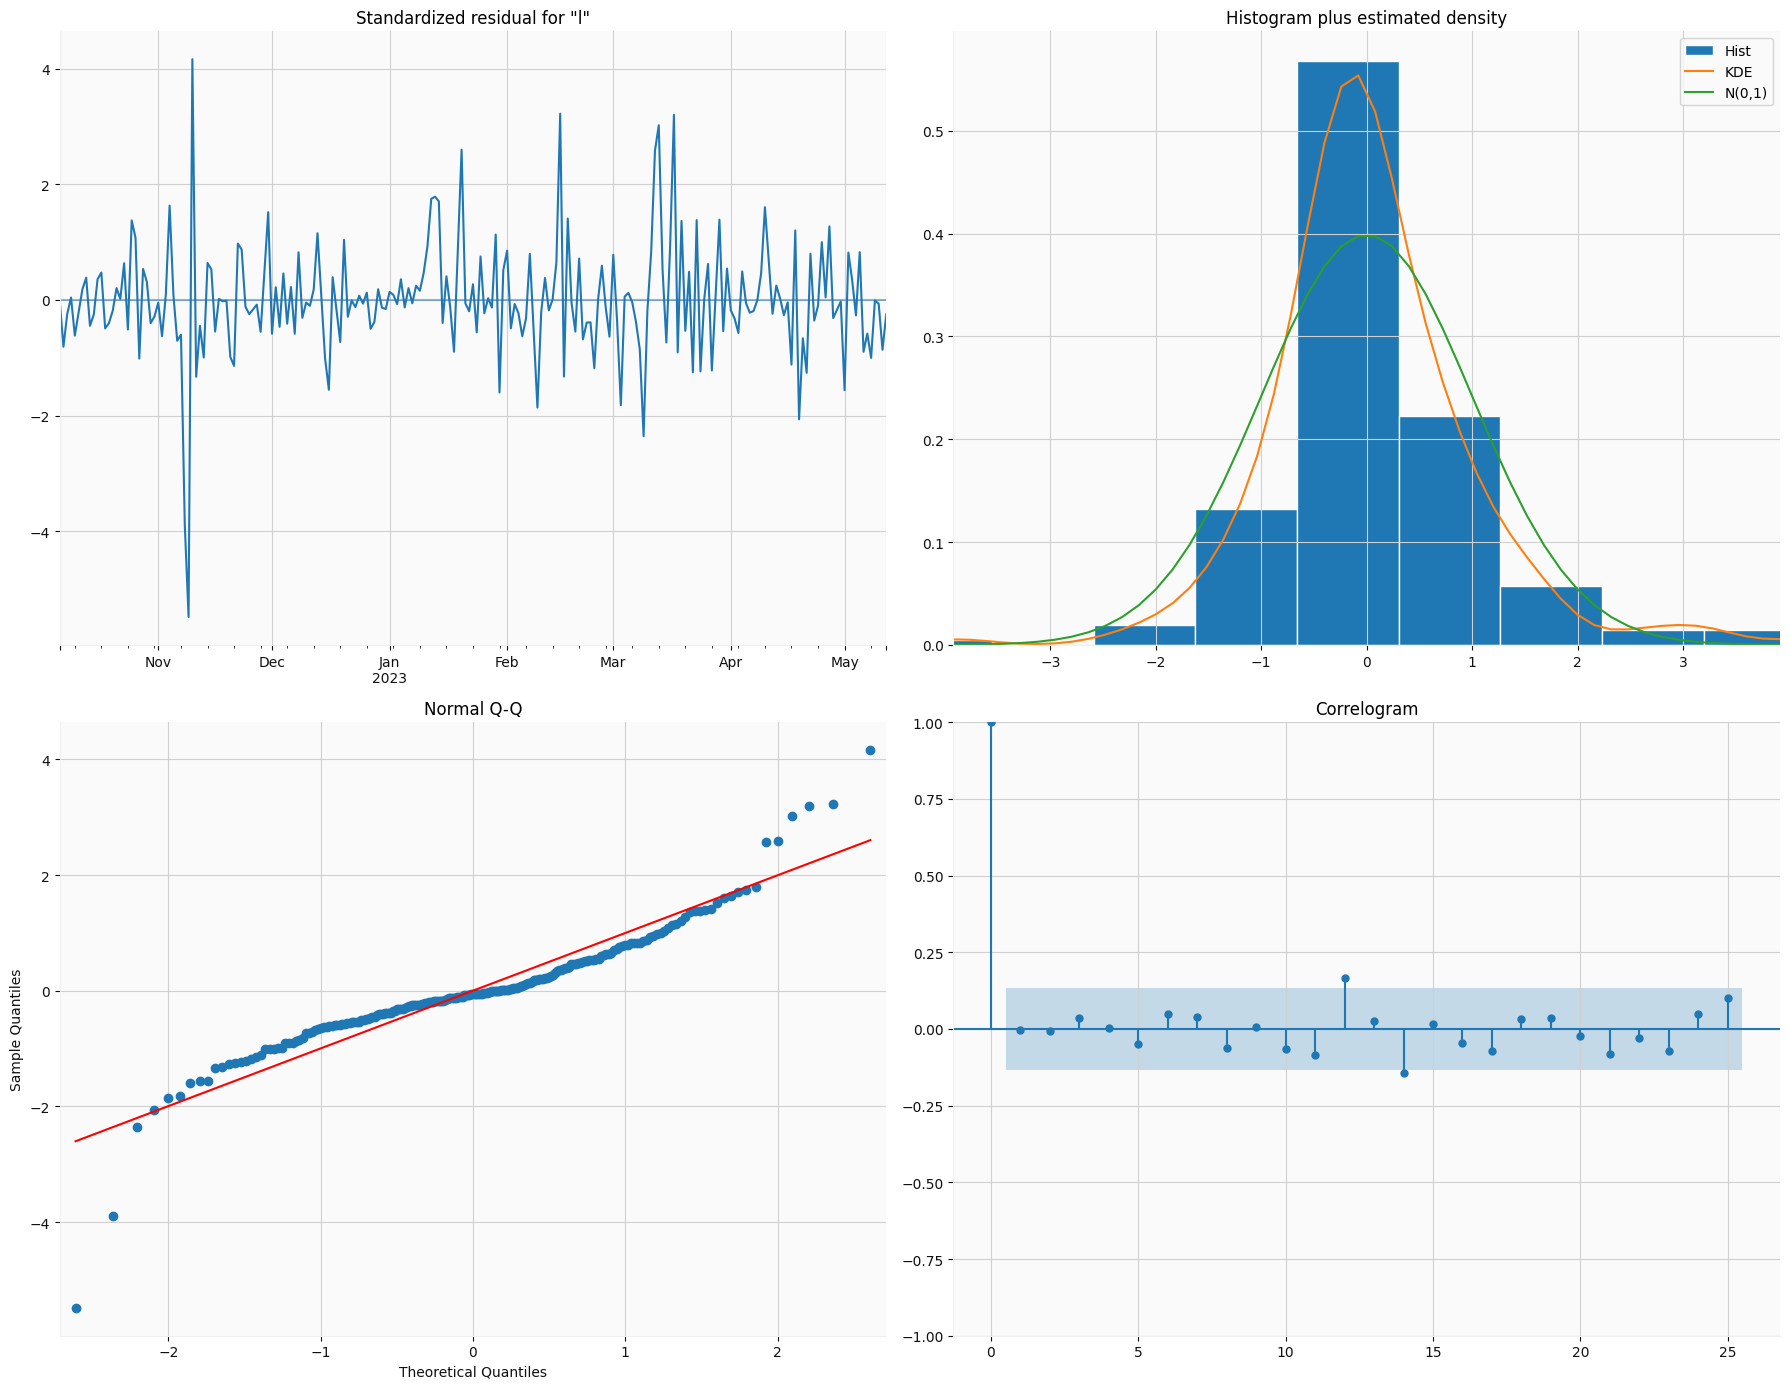

In [56]:
arima_202.plot_diagnostics(figsize=(18, 14), lags=25)

sns.despine()
plt.tight_layout()

## applying Ljung-Box's test for no autocorrelation

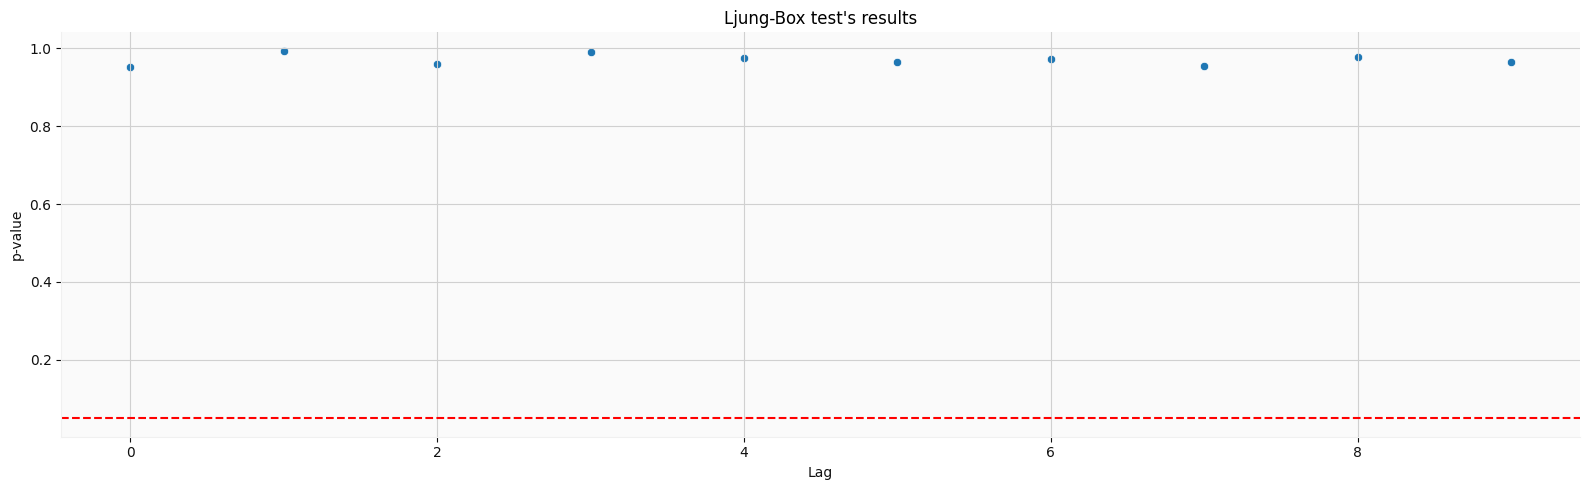

In [57]:
ljung_box_results = arima_202.test_serial_correlation(method="ljungbox")
ljung_box_pvals = ljung_box_results[0][1]

fig, ax = plt.subplots(1, figsize=[16, 5])
sns.scatterplot(x=range(len(ljung_box_pvals)),
                y=ljung_box_pvals,
                ax=ax)
ax.axhline(0.05, ls="--", c="r")
ax.set(title="Ljung-Box test's results",
       xlabel="Lag",
       ylabel="p-value")

sns.despine()
plt.tight_layout()

## Finding the best-fitting ARIMA model with auto-ARIMA

In [58]:
import pmdarima as pm

In [110]:
TEST_LENGTH = test_len
df_train = data.iloc[:-TEST_LENGTH]
df_test = data.iloc[-TEST_LENGTH:]

In [111]:
auto_arima = pm.auto_arima(df_train['log_rtn'].dropna(),
                           test="adf",
                           seasonal=False,
                           with_intercept=False,
                           stepwise=True,
                           suppress_warnings=True,
                           trace=True)

print(auto_arima.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-943.420, Time=0.18 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-950.135, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-949.091, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-949.065, Time=0.07 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-947.312, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-948.674, Time=0.08 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 0.580 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  218
Model:                        SARIMAX   Log Likelihood                 476.067
Date:                Thu, 06 Jul 2023   AIC                           -950.135
Time:                        22:14:33   BIC                           -946.750
Sample:                    10-07-2022   HQIC                          -948.768
          

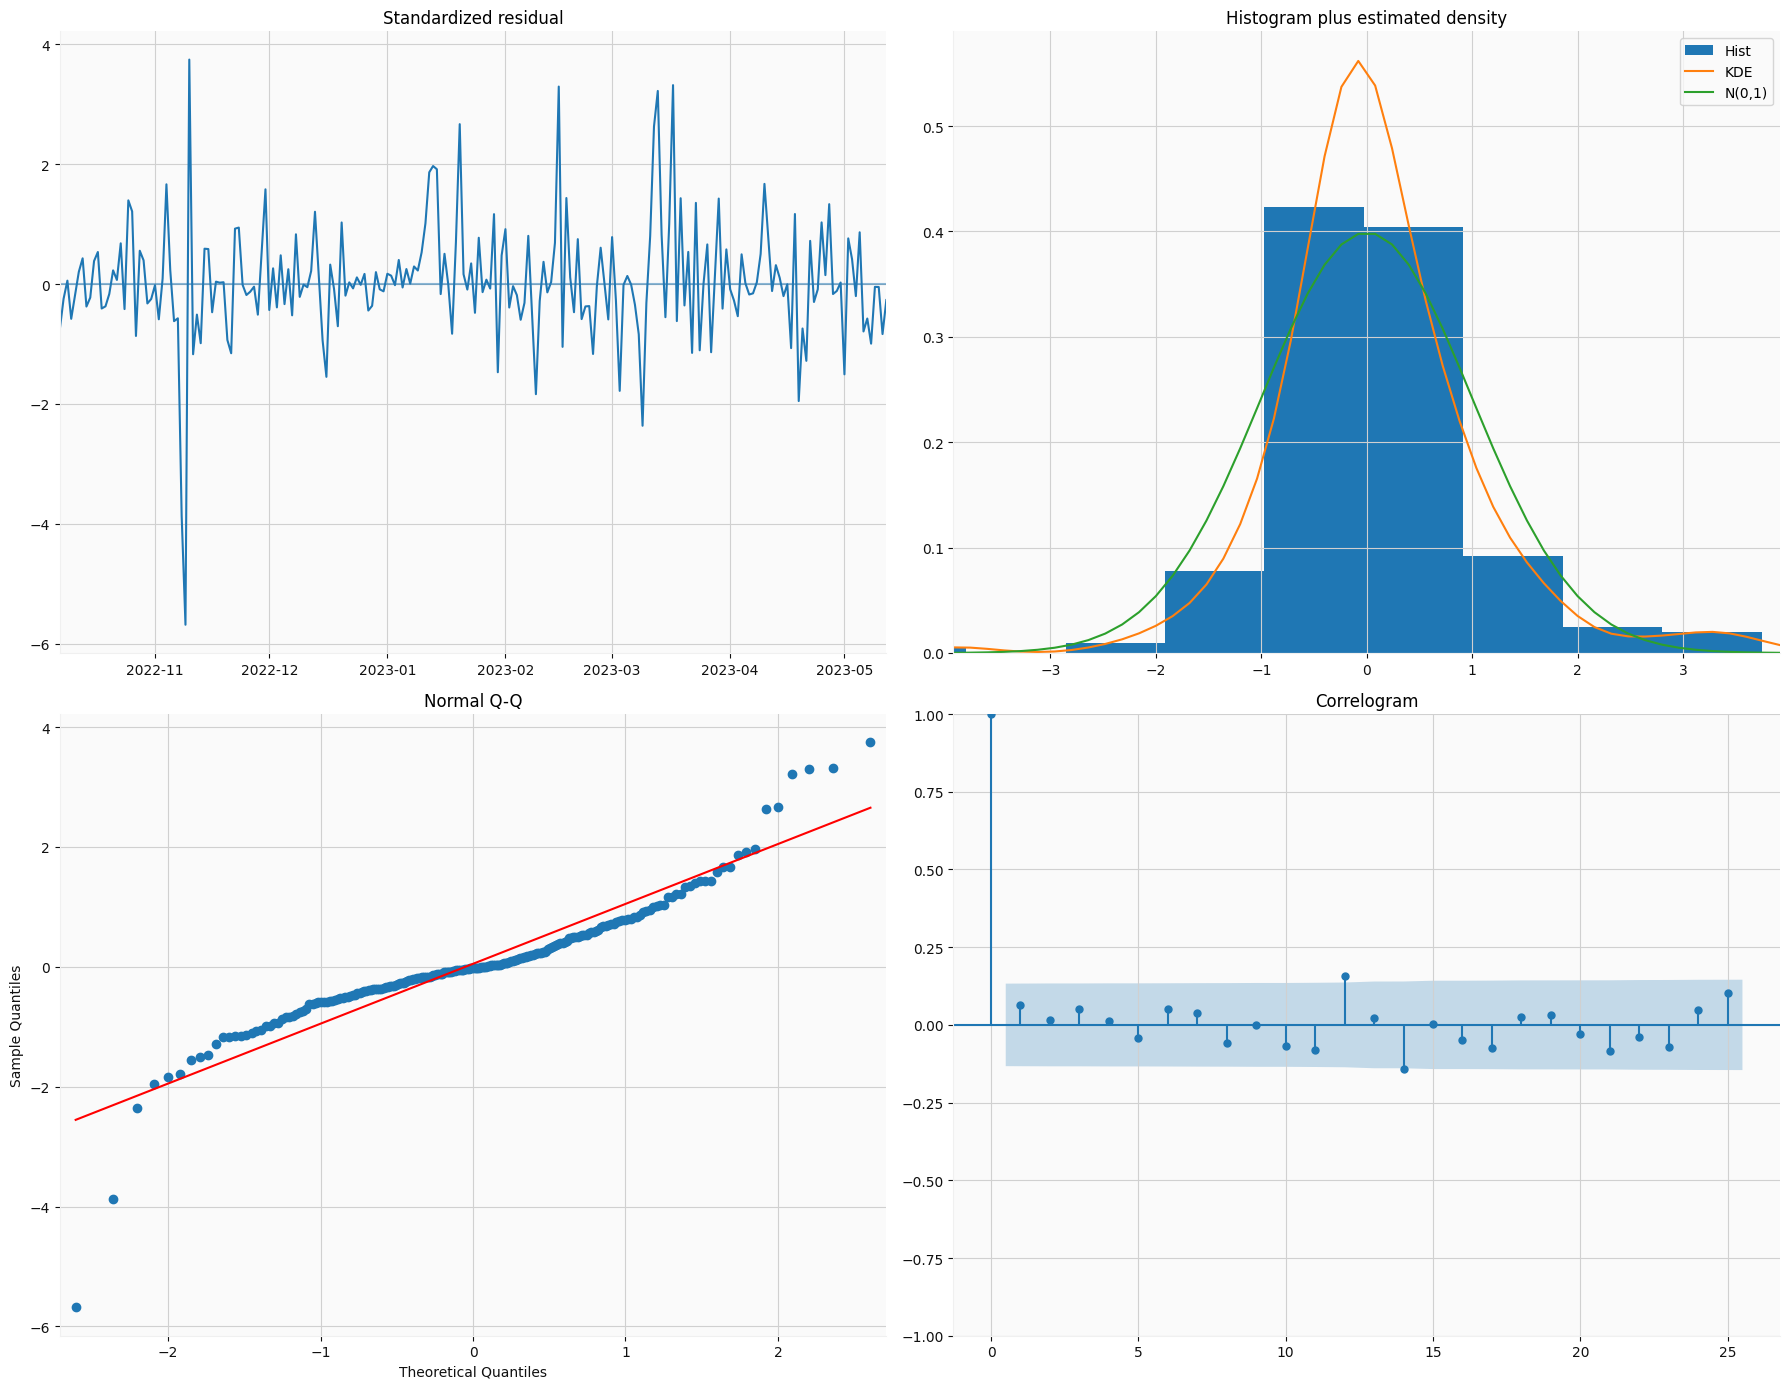

In [112]:
auto_arima.plot_diagnostics(figsize=(18, 14), lags=25)

sns.despine()
plt.tight_layout()

In [142]:
auto_sarima = pm.auto_arima(df_train['log_rtn'].dropna(),
                            test="adf",
                            seasonal=True,
                            m=14,
                            with_intercept=False,
                            stepwise=True,
                            suppress_warnings=True,
                            trace=True)
print(auto_sarima.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[14]             : AIC=-945.097, Time=2.88 sec
 ARIMA(0,0,0)(0,0,0)[14]             : AIC=-950.135, Time=0.10 sec
 ARIMA(1,0,0)(1,0,0)[14]             : AIC=-951.430, Time=0.49 sec
 ARIMA(0,0,1)(0,0,1)[14]             : AIC=-950.701, Time=0.67 sec
 ARIMA(1,0,0)(0,0,0)[14]             : AIC=-949.091, Time=0.17 sec
 ARIMA(1,0,0)(2,0,0)[14]             : AIC=-951.017, Time=1.32 sec
 ARIMA(1,0,0)(1,0,1)[14]             : AIC=-950.842, Time=1.91 sec
 ARIMA(1,0,0)(0,0,1)[14]             : AIC=-950.766, Time=1.08 sec
 ARIMA(1,0,0)(2,0,1)[14]             : AIC=-949.056, Time=4.69 sec
 ARIMA(0,0,0)(1,0,0)[14]             : AIC=-952.252, Time=0.33 sec
 ARIMA(0,0,0)(2,0,0)[14]             : AIC=-951.710, Time=1.12 sec
 ARIMA(0,0,0)(1,0,1)[14]             : AIC=-951.547, Time=0.58 sec
 ARIMA(0,0,0)(0,0,1)[14]             : AIC=-951.645, Time=0.15 sec
 ARIMA(0,0,0)(2,0,1)[14]             : AIC=-949.751, Time=1.33 sec
 ARIMA(0,0,1)(1,0,0

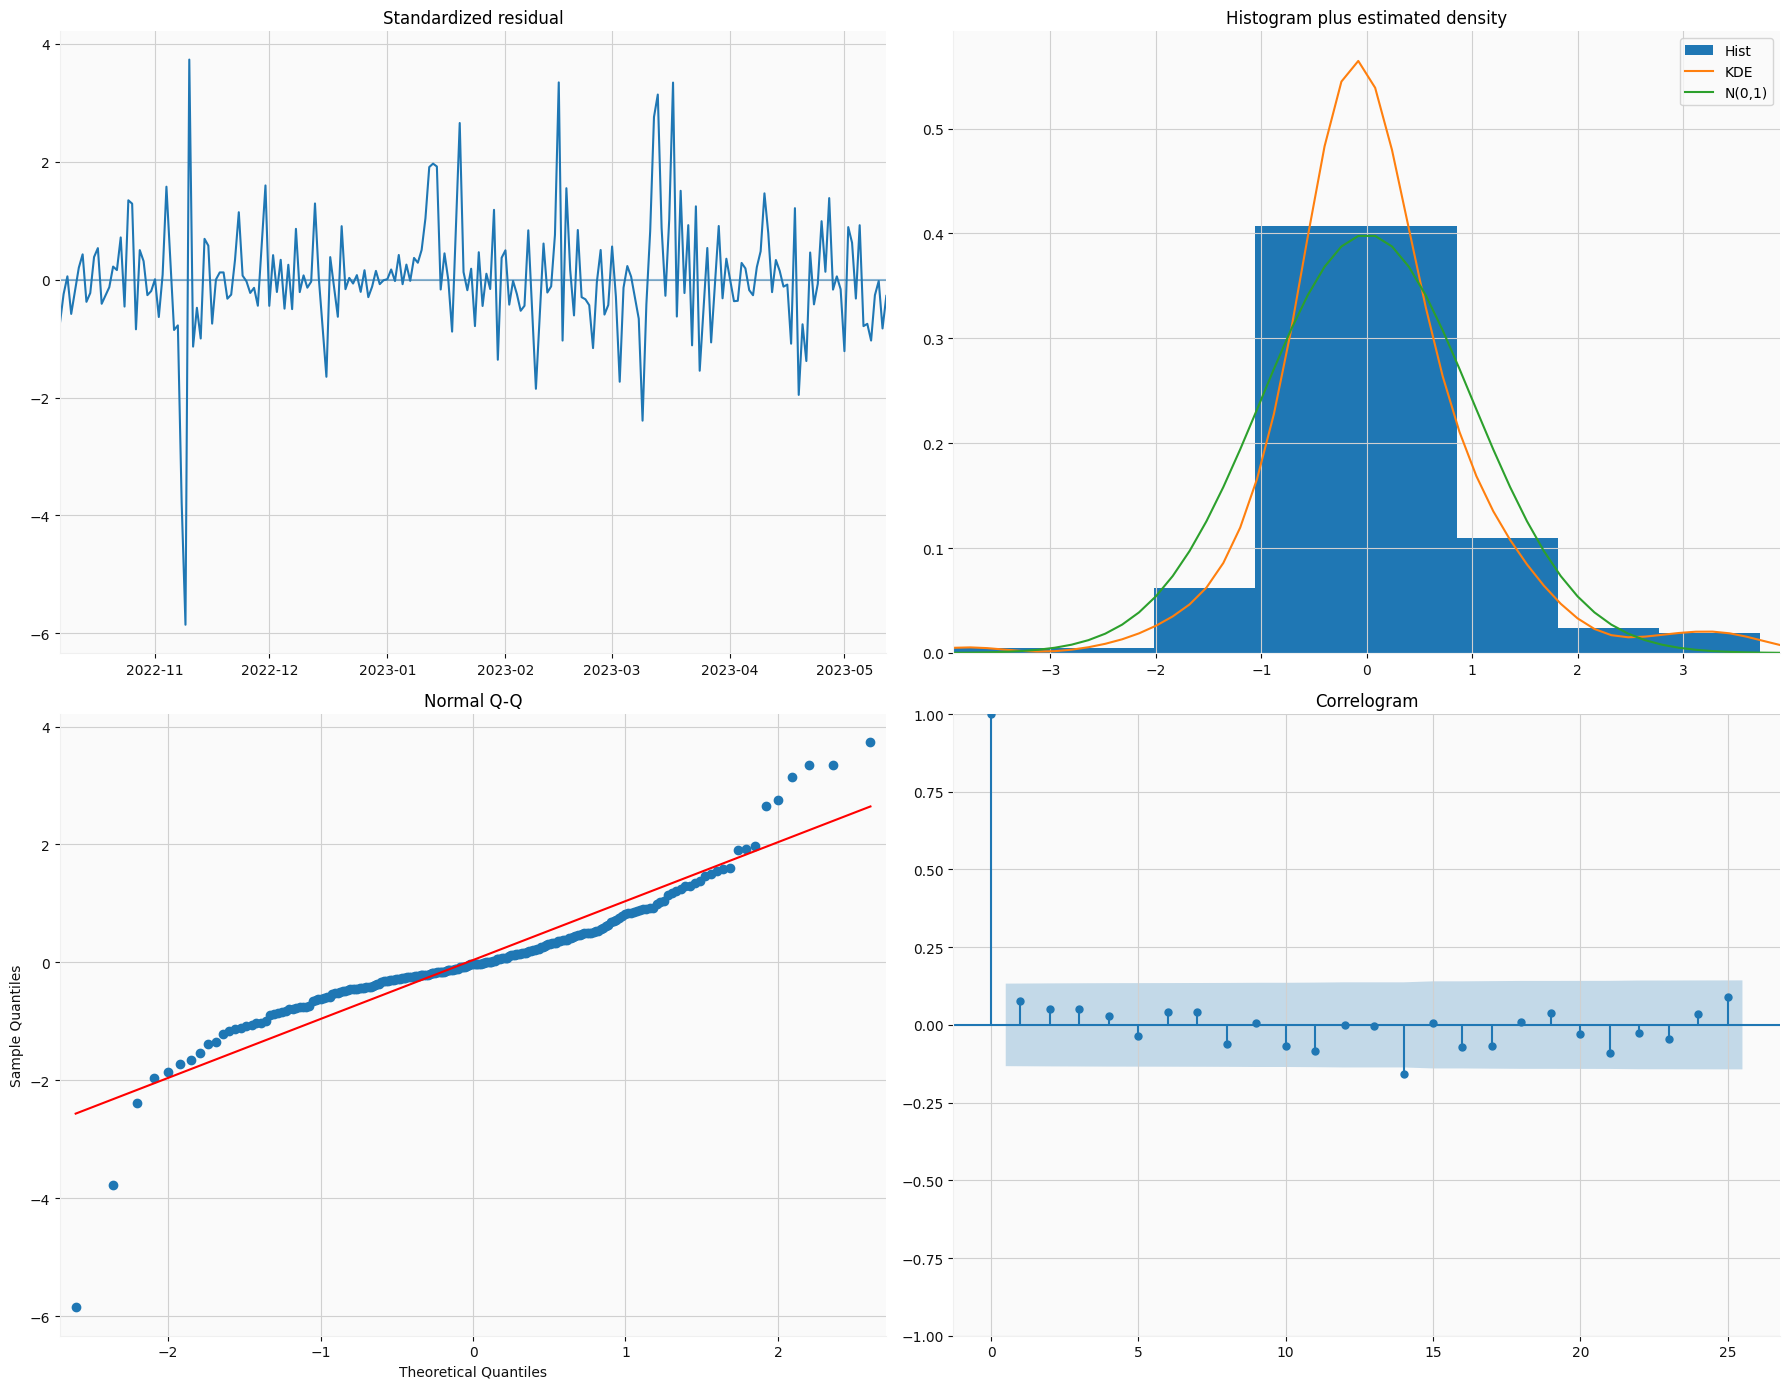

In [114]:
auto_sarima.plot_diagnostics(figsize=(18, 14), lags=25);

sns.despine()
plt.tight_layout()

In [115]:
auto_sarima.predict(test_len)

2023-05-13   -6.531279e-03
2023-05-14    3.301092e-03
2023-05-15    1.796908e-03
2023-05-16   -8.722665e-04
2023-05-17    3.742620e-03
2023-05-18   -3.429060e-03
2023-05-19   -2.494347e-03
2023-05-20   -4.311057e-03
2023-05-21   -2.040553e-04
2023-05-22   -2.130805e-04
2023-05-23   -3.617429e-03
2023-05-24   -1.157892e-03
2023-05-25   -1.039090e-03
2023-05-26    5.251853e-04
2023-05-27    2.858779e-04
2023-05-28   -1.387727e-04
2023-05-29    5.954298e-04
2023-05-30   -5.455442e-04
2023-05-31   -3.968367e-04
2023-06-01   -6.858650e-04
2023-06-02   -3.246405e-05
2023-06-03   -3.389991e-05
2023-06-04   -5.755126e-04
2023-06-05   -1.842141e-04
2023-06-06   -1.653134e-04
2023-06-07    8.355403e-05
2023-06-08    4.548157e-05
2023-06-09   -2.207796e-05
2023-06-10    9.472954e-05
2023-06-11   -8.679302e-05
2023-06-12   -6.313449e-05
2023-06-13   -1.091173e-04
2023-06-14   -5.164848e-06
2023-06-15   -5.393285e-06
2023-06-16   -9.156083e-05
2023-06-17   -2.930742e-05
2023-06-18   -2.630043e-05
2

In [116]:
df_test["auto_arima"] = auto_arima.predict(test_len)
df_test["auto_sarima"] = auto_sarima.predict(test_len)

<ipython-input-116-7ab3e1d87621>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["auto_arima"] = auto_arima.predict(test_len)
<ipython-input-116-7ab3e1d87621>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["auto_sarima"] = auto_sarima.predict(test_len)


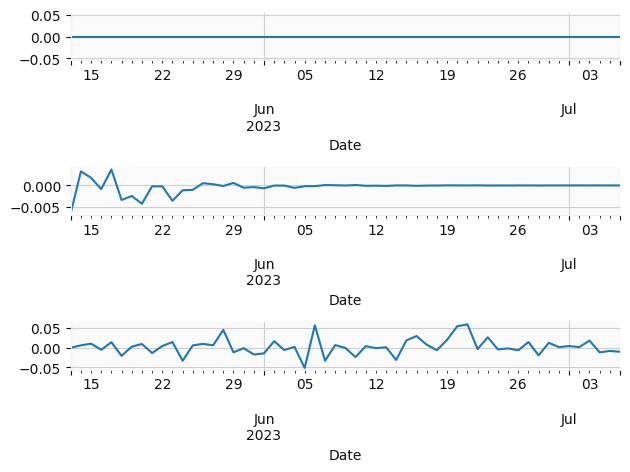

In [117]:
fig, ax = plt.subplots(3, 1)
df_test["auto_arima"].plot(ax=ax[0])
df_test["auto_sarima"].plot(ax=ax[1])
data['log_rtn'][-test_len:].plot(ax=ax[2])
sns.despine()
plt.tight_layout()

In [128]:
data['auto_arima_log_rtn']= pd.concat([df_train['log_rtn'], auto_arima.predict(test_len)])
pred_price_list = np.exp(data['auto_arima_log_rtn'].cumsum())

data['arima_pred_000'] = np.array(pred_price_list)* data['Adj Close'][0]
data['arima_pred_000'].tail(10),data['Adj Close'][-1]


(Date
 2023-06-27    26804.990234
 2023-06-28    26804.990234
 2023-06-29    26804.990234
 2023-06-30    26804.990234
 2023-07-01    26804.990234
 2023-07-02    26804.990234
 2023-07-03    26804.990234
 2023-07-04    26804.990234
 2023-07-05    26804.990234
 2023-07-06    26804.990234
 Name: arima_pred_000, dtype: float64,
 30190.43359375)

In [120]:
data['auto_sarima_log_rtn']= pd.concat([df_train['log_rtn'], auto_sarima.predict(test_len)])
pred_price_list = np.exp(data['auto_sarima_log_rtn'].cumsum())

data['sarima_pred_100'] = np.array(pred_price_list)* data['Adj Close'][0]
data['sarima_pred_100'].tail(10),data['Adj Close'][-1]


(Date
 2023-06-27    26363.522137
 2023-06-28    26363.138107
 2023-06-29    26363.015186
 2023-06-30    26362.904876
 2023-07-01    26362.960630
 2023-07-02    26362.990978
 2023-07-03    26362.976246
 2023-07-04    26363.039457
 2023-07-05    26362.981542
 2023-07-06    26362.939414
 Name: sarima_pred_100, dtype: float64,
 30190.43359375)

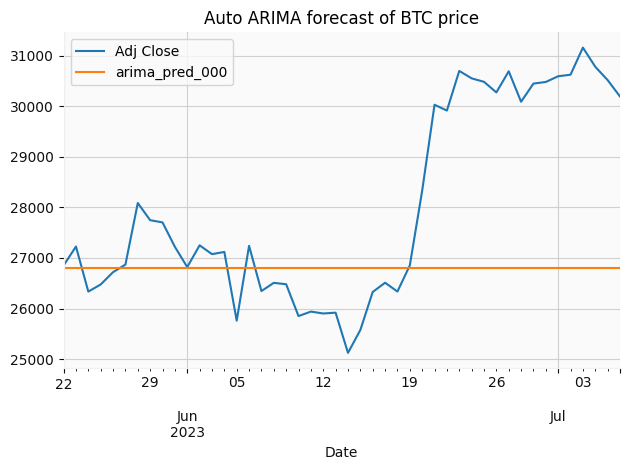

In [129]:
latest_data = data[data.index>'2023-05-20']


(
    latest_data[["Adj Close", 'arima_pred_000']].dropna()
    .iloc[1:]
    .plot(title="Auto ARIMA forecast of BTC price")
);

sns.despine()
plt.tight_layout()

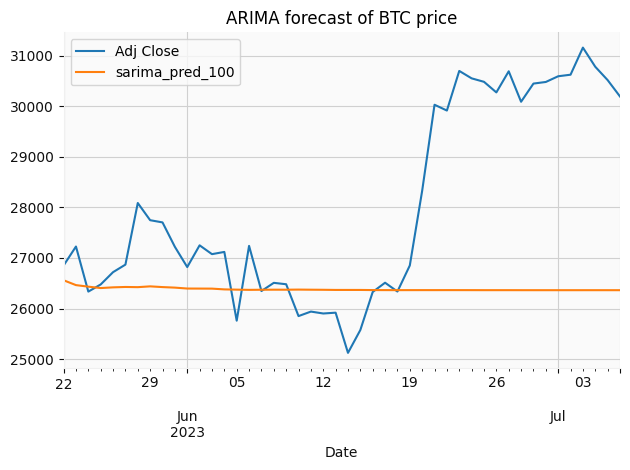

In [119]:
latest_data = data[data.index>'2023-05-20']


(
    latest_data[["Adj Close", 'sarima_pred_100']].dropna()
    .iloc[1:]
    .plot(title="Auto SARIMA forecast of BTC price")
);

sns.despine()
plt.tight_layout()

In [130]:
mape_auto_arima = mean_absolute_percentage_error(
    data["Adj Close"][-test_len:],
    data["arima_pred_000"][-test_len:]
)

mape_auto_sarima = mean_absolute_percentage_error(
    data["Adj Close"][-test_len:],
    data["sarima_pred_100"][-test_len:]
)

print(f"MAPE of auto-ARIMA: {100*mape_auto_arima:.2f}%")
print(f"MAPE of auto-SARIMA: {100*mape_auto_sarima:.2f}%")

MAPE of auto-ARIMA: 4.84%
MAPE of auto-SARIMA: 5.31%


### the best arima model for log_rtn is 2.0.2